In [1]:
# Imports
import pandas as pd
%matplotlib inline

In [2]:
# Load csv 
url = 'https://raw.githubusercontent.com/kfern/jupyter/next/covid19-es-and/covid19-es-and.csv'
dfCSV = pd.read_csv(url, index_col=['Provincia', 'Fecha'])

In [3]:
# Prepare
dfCSV['pctChange'] = dfCSV.groupby(level='Provincia')['Ingresados'].pct_change() * 100
dfCSV.loc['Huelva', ['Ingresados', 'pctChange']].tail(3)

,Ingresados,pctChange
Fecha,,
05/04/2020,140,6.060606
06/04/2020,143,2.142857
07/04/2020,147,2.797203


Provincia
Almería    AxesSubplot(0.125,0.125;0.775x0.755)
Cádiz      AxesSubplot(0.125,0.125;0.775x0.755)
Córdoba    AxesSubplot(0.125,0.125;0.775x0.755)
Granada    AxesSubplot(0.125,0.125;0.775x0.755)
Huelva     AxesSubplot(0.125,0.125;0.775x0.755)
Jaén       AxesSubplot(0.125,0.125;0.775x0.755)
Málaga     AxesSubplot(0.125,0.125;0.775x0.755)
Sevilla    AxesSubplot(0.125,0.125;0.775x0.755)
Total      AxesSubplot(0.125,0.125;0.775x0.755)
Name: pctChange, dtype: object

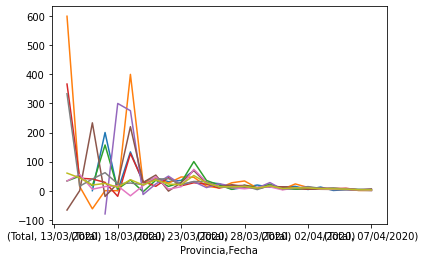

In [4]:
dfCSV.groupby(level='Provincia')['pctChange'].plot()

In [5]:
dfCSV.groupby(level='Provincia')['pctChange'].tail(1)

Provincia  Fecha     
Almería    07/04/2020    0.653595
Cádiz      07/04/2020    0.817439
Córdoba    07/04/2020    1.745636
Granada    07/04/2020    2.722772
Huelva     07/04/2020    2.797203
Jaén       07/04/2020    6.122449
Málaga     07/04/2020    0.735971
Sevilla    07/04/2020    4.241645
Total      07/04/2020    2.555004
Name: pctChange, dtype: float64

In [6]:
dfCSV.groupby(level='Provincia')['pctChange'].tail(2).describe()

count    18.000000
mean      2.572173
std       1.488411
min       0.547945
25%       1.429786
50%       2.695567
75%       3.098881
max       6.122449
Name: pctChange, dtype: float64

Provincia
Almería    AxesSubplot(0.125,0.125;0.775x0.755)
Cádiz      AxesSubplot(0.125,0.125;0.775x0.755)
Córdoba    AxesSubplot(0.125,0.125;0.775x0.755)
Granada    AxesSubplot(0.125,0.125;0.775x0.755)
Huelva     AxesSubplot(0.125,0.125;0.775x0.755)
Jaén       AxesSubplot(0.125,0.125;0.775x0.755)
Málaga     AxesSubplot(0.125,0.125;0.775x0.755)
Sevilla    AxesSubplot(0.125,0.125;0.775x0.755)
Total      AxesSubplot(0.125,0.125;0.775x0.755)
Name: pctChange, dtype: object

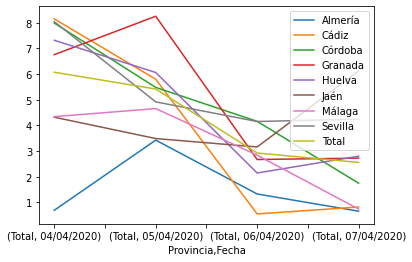

In [7]:
dias = 4
dfCSV[dias*-9:].groupby(level='Provincia')['pctChange'].plot(legend=True)

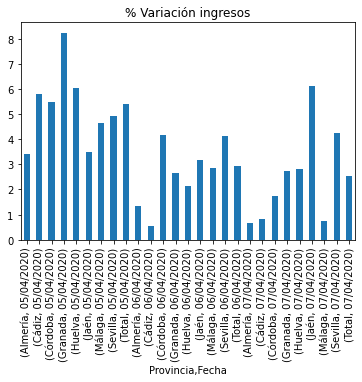

In [8]:
dfCSV.groupby(level='Provincia')['pctChange'].tail(3).plot(kind='bar', title='% Variación ingresos')

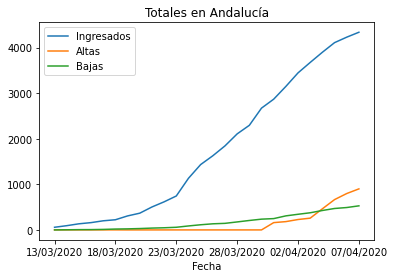

In [9]:
dfCSV.loc['Total'][['Ingresados', 'Altas', 'Bajas']].plot(title='Totales en Andalucía')

In [10]:
provincia_select = 'Total'
data = dfCSV.loc[provincia_select][['Ingresados', 'pctChange']]

In [11]:
title = '% Variación personas ingresadas últimos días en ' + provincia_select
print(title)
data[-3:][['pctChange']]

% Variación personas ingresadas últimos días en Total


,pctChange
Fecha,
05/04/2020,5.415811
06/04/2020,2.921841
07/04/2020,2.555004


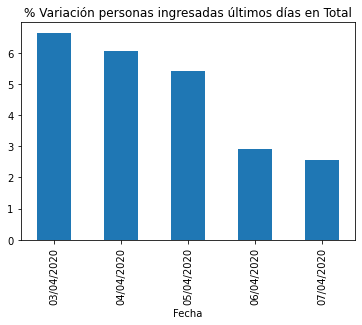

In [12]:
data[-5:]['pctChange'].plot(kind='bar', title=title)

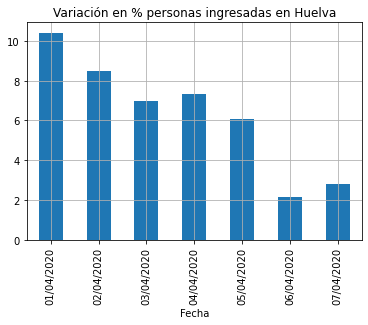

In [13]:
provincia_title = 'Huelva'
lastweek_data = dfCSV.loc[provincia_title][-7:]['pctChange']
lastweek_data.plot(kind='bar', title='Variación en % personas ingresadas en ' + provincia_title, grid=True);

In [14]:
lastweek_data.describe()

count     7.000000
mean      6.311642
std       2.967007
min       2.142857
25%       4.428904
50%       6.956522
75%       7.903820
max      10.416667
Name: pctChange, dtype: float64

In [15]:
lastweek_data

Fecha
01/04/2020    10.416667
02/04/2020     8.490566
03/04/2020     6.956522
04/04/2020     7.317073
05/04/2020     6.060606
06/04/2020     2.142857
07/04/2020     2.797203
Name: pctChange, dtype: float64